# ETS models¶
The ETS models are a family of time series models with an underlying state space model consisting of a level component, a trend component (T), a seasonal component (S), and an error term (E).

This notebook shows how they can be used with statsmodels. For a more thorough treatment we refer to [1], chapter 8 (free online resource), on which the implementation in statsmodels and the examples used in this notebook are based.

statsmodels implements all combinations of: - additive and multiplicative error model - additive and multiplicative trend, possibly dampened - additive and multiplicative seasonality

However, not all of these methods are stable. Refer to [1] and references therein for more info about model stability.

[1] Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice, 3rd edition, OTexts, 2019. https://www.otexts.org/fpp3/7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)


## Simple exponential smoothing¶
The simplest of the ETS models is also known as simple exponential smoothing. In ETS terms, it corresponds to the (A, N, N) model, that is, a model with additive errors, no trend, and no seasonality. The state space formulation of Holt’s method is:

 \begin{align}
y_{t} &= y_{t-1} + e_t\\
l_{t} &= l_{t-1} + \alpha e_t\\
\end{align}

This state space formulation can be turned into a different formulation, a forecast and a smoothing equation (as can be done with all ETS models):

 \begin{align}
\hat{y}_{t|t-1} &= l_{t-1}\\
l_{t} &= \alpha y_{t-1} + (1 - \alpha) l_{t-1}
\end{align}

Here, \hat{y}_{t|t-1} is the forecast/expectation of y_t given the information of the previous step. In the simple exponential smoothing model, the forecast corresponds to the previous level. The second equation (smoothing equation) calculates the next level as weighted average of the previous level and the previous observation.

Text(0, 0.5, 'Annual oil production in Saudi Arabia (Mt)')

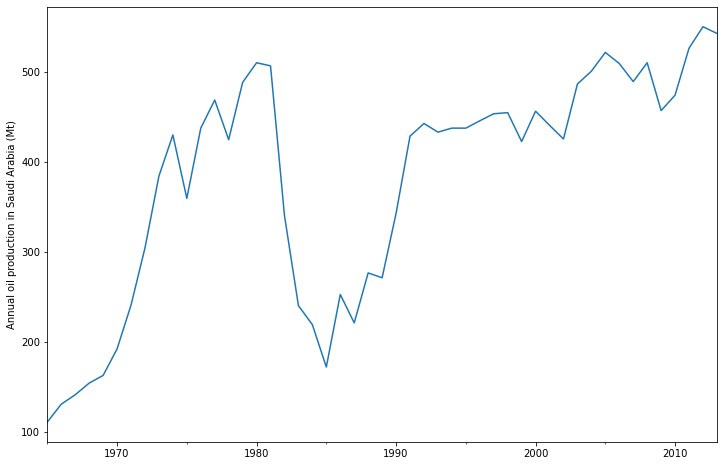

In [3]:
oildata = [
    111.0091,
    130.8284,
    141.2871,
    154.2278,
    162.7409,
    192.1665,
    240.7997,
    304.2174,
    384.0046,
    429.6622,
    359.3169,
    437.2519,
    468.4008,
    424.4353,
    487.9794,
    509.8284,
    506.3473,
    340.1842,
    240.2589,
    219.0328,
    172.0747,
    252.5901,
    221.0711,
    276.5188,
    271.1480,
    342.6186,
    428.3558,
    442.3946,
    432.7851,
    437.2497,
    437.2092,
    445.3641,
    453.1950,
    454.4096,
    422.3789,
    456.0371,
    440.3866,
    425.1944,
    486.2052,
    500.4291,
    521.2759,
    508.9476,
    488.8889,
    509.8706,
    456.7229,
    473.8166,
    525.9509,
    549.8338,
    542.3405,
]
oil = pd.Series(oildata, index=pd.date_range("1965", "2013", freq="AS"))
oil.plot()
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

The plot above shows annual oil production in Saudi Arabia in million tonnes. The data are taken from the R package fpp2 (companion package to prior version [1]). Below you can see how to fit a simple exponential smoothing model using statsmodels’s ETS implementation to this data. Additionally, the fit using forecast in R is shown as comparison.



**ATTENTION**
Parameter: maxiter

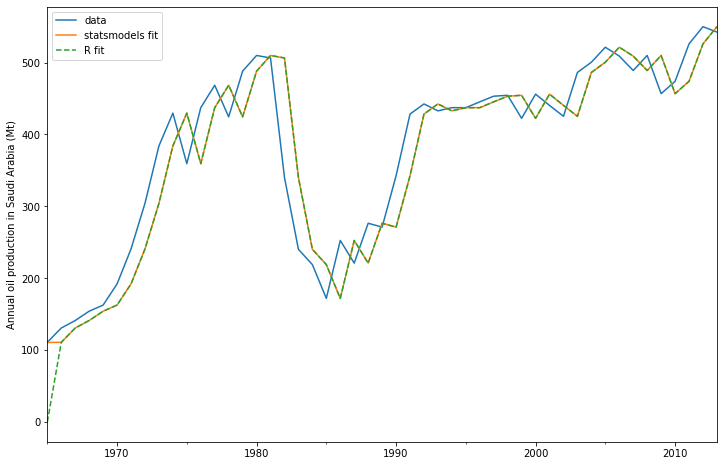

In [4]:
model = ETSModel(oil)
fit = model.fit(maxiter=10000)
oil.plot(label="data")
fit.fittedvalues.plot(label="statsmodels fit")
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

# obtained from R
params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params_R).fittedvalues
yhat.plot(label="R fit", linestyle="--")

plt.legend()

In [5]:
# To see MOST parameter as dict
model = ETSModel(oil)
print(model.__dict__)

{'data': <statsmodels.base.data.PandasData object at 0x000001A8E8D13BB0>, 'k_constant': 0, 'exog': None, 'endog': array([111.0091, 130.8284, 141.2871, 154.2278, 162.7409, 192.1665,
       240.7997, 304.2174, 384.0046, 429.6622, 359.3169, 437.2519,
       468.4008, 424.4353, 487.9794, 509.8284, 506.3473, 340.1842,
       240.2589, 219.0328, 172.0747, 252.5901, 221.0711, 276.5188,
       271.148 , 342.6186, 428.3558, 442.3946, 432.7851, 437.2497,
       437.2092, 445.3641, 453.195 , 454.4096, 422.3789, 456.0371,
       440.3866, 425.1944, 486.2052, 500.4291, 521.2759, 508.9476,
       488.8889, 509.8706, 456.7229, 473.8166, 525.9509, 549.8338,
       542.3405]), '_data_attr': ['exog', 'endog', 'data.exog', 'data.endog', 'data.orig_endog', 'data.orig_exog'], '_init_keys': [], '_index': DatetimeIndex(['1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-0

In [6]:
# To see ALL parameter as list
# __ mean reserved methods/constructor
# _ mean private and/or may be deprecated later. Do not use
# Change those without

print(dir(model))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_kwargs', '_convert_and_bound_start_params', '_data_attr', '_default_start_params', '_fit_collinear', '_fit_zeros', '_fixed_params', '_fixed_params_index', '_formula_max_endog', '_free_params_index', '_get_exog_names', '_get_index_label_loc', '_get_index_loc', '_get_init_kwds', '_get_internal_states', '_get_prediction_index', '_get_states', '_handle_data', '_has_fixed_params', '_hessian_complex_step', '_hessian_finite_difference', '_index', '_index_dates', '_index_freq', '_index_generated', '_index_inferred_freq', '_index_int64', '_index_none', '_init_dates', '_init_keys', '_init_kwargs', '_internal_initial_state_names', '_internal_param_na

In [12]:
param_ls = dir(model)
param_pub = [x for x in param_ls if not x.startswith('_')]
param_pub

['bounds',
 'clone',
 'damped_trend',
 'data',
 'endog',
 'endog_names',
 'error',
 'exog',
 'exog_names',
 'fit',
 'fit_constrained',
 'fix_params',
 'from_formula',
 'has_seasonal',
 'has_trend',
 'hessian',
 'information',
 'initial_level',
 'initial_seasonal',
 'initial_state_names',
 'initial_trend',
 'initialization_method',
 'initialize',
 'k_constant',
 'k_endog',
 'k_params',
 'loglike',
 'nobs',
 'nobs_effective',
 'param_names',
 'predict',
 'prepare_data',
 'score',
 'seasonal',
 'seasonal_periods',
 'set_bounds',
 'set_initialization_method',
 'short_name',
 'smooth',
 'start_params',
 'state_names',
 'trend',
 'update',
 'use_internal_loglike',
 'use_pandas']

By default the initial states are considered to be fitting parameters and are estimated by maximizing log-likelihood. It is possible to only use a heuristic for the initial values:

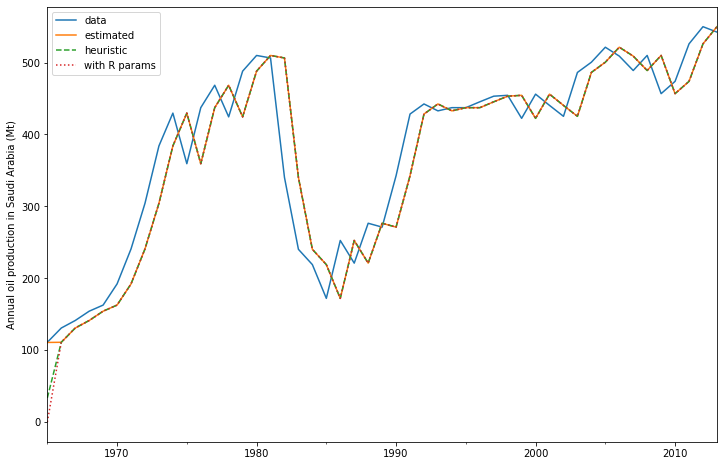

In [13]:
model_heuristic = ETSModel(oil, initialization_method="heuristic")
fit_heuristic = model_heuristic.fit()
oil.plot(label="data")
fit.fittedvalues.plot(label="estimated")
fit_heuristic.fittedvalues.plot(label="heuristic", linestyle="--")
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

# obtained from R
params = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params).fittedvalues
yhat.plot(label="with R params", linestyle=":")

plt.legend()

The fitted parameters and some other measures are shown using fit.summary(). Here we can see that the log-likelihood of the model using fitted initial states is fractionally lower than the one using a heuristic for the initial states.


In [14]:
print(fit.summary())


                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   49
Model:                       ETS(ANN)   Log Likelihood                -259.257
Date:                Fri, 18 Mar 2022   AIC                            524.514
Time:                        16:51:55   BIC                            530.189
Sample:                    01-01-1965   HQIC                           526.667
                         - 01-01-2013   Scale                         2307.767
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.132      7.551      0.000       0.740       1.259
initial_level     110.7864     48.110      2.303      0.021      16.492     205.081
Ljung-Box (Q):                  

In [15]:
print(fit_heuristic.summary())


                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   49
Model:                       ETS(ANN)   Log Likelihood                -260.521
Date:                Fri, 18 Mar 2022   AIC                            525.042
Time:                        16:52:38   BIC                            528.826
Sample:                    01-01-1965   HQIC                           526.477
                         - 01-01-2013   Scale                         2429.964
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.132      7.559      0.000       0.741       1.259
              initialization method: heuristic
----------------------------------------------
initial_level         

## Holt-Winters’ seasonal method¶
The exponential smoothing method can be modified to incorporate a trend and a seasonal component. In the additive Holt-Winters’ method, the seasonal component is added to the rest. This model corresponds to the ETS(A, A, A) model, and has the following state space formulation:
\begin{align}
y_t &= l_{t-1} + b_{t-1} + s_{t-m} + e_t\\
l_{t} &= l_{t-1} + b_{t-1} + \alpha e_t\\
b_{t} &= b_{t-1} + \beta e_t\\
s_{t} &= s_{t-m} + \gamma e_t
\end{align}

Text(0, 0.5, 'Australian Tourists')

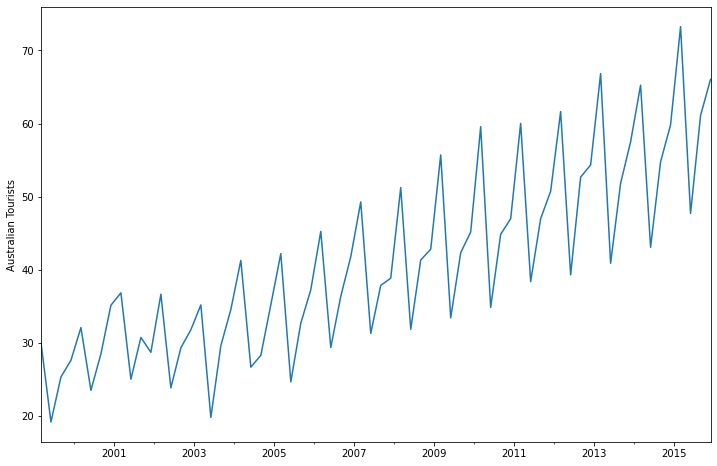

In [16]:
austourists_data = [
    30.05251300,
    19.14849600,
    25.31769200,
    27.59143700,
    32.07645600,
    23.48796100,
    28.47594000,
    35.12375300,
    36.83848500,
    25.00701700,
    30.72223000,
    28.69375900,
    36.64098600,
    23.82460900,
    29.31168300,
    31.77030900,
    35.17787700,
    19.77524400,
    29.60175000,
    34.53884200,
    41.27359900,
    26.65586200,
    28.27985900,
    35.19115300,
    42.20566386,
    24.64917133,
    32.66733514,
    37.25735401,
    45.24246027,
    29.35048127,
    36.34420728,
    41.78208136,
    49.27659843,
    31.27540139,
    37.85062549,
    38.83704413,
    51.23690034,
    31.83855162,
    41.32342126,
    42.79900337,
    55.70835836,
    33.40714492,
    42.31663797,
    45.15712257,
    59.57607996,
    34.83733016,
    44.84168072,
    46.97124960,
    60.01903094,
    38.37117851,
    46.97586413,
    50.73379646,
    61.64687319,
    39.29956937,
    52.67120908,
    54.33231689,
    66.83435838,
    40.87118847,
    51.82853579,
    57.49190993,
    65.25146985,
    43.06120822,
    54.76075713,
    59.83447494,
    73.25702747,
    47.69662373,
    61.09776802,
    66.05576122,
]
index = pd.date_range("1999-03-01", "2015-12-01", freq="3MS")
austourists = pd.Series(austourists_data, index=index)
austourists.plot()
plt.ylabel("Australian Tourists")

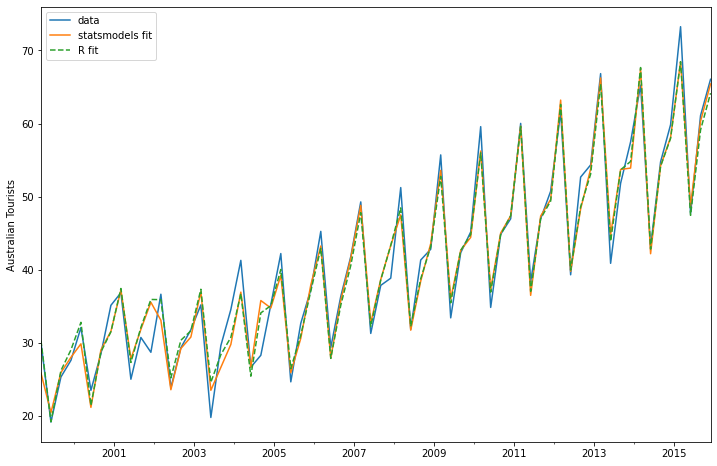

In [19]:
# fit in statsmodels
model = ETSModel(
    austourists,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=True,
    seasonal_periods=4,
)
fit = model.fit()

# fit with R params
params_R = [
    0.35445427,
    0.03200749,
    0.39993387,
    0.97999997,
    24.01278357,
    0.97770147,
    1.76951063,
    -0.50735902,
    -6.61171798,
    5.34956637,
]
fit_R = model.smooth(params_R)

austourists.plot(label="data")
plt.ylabel("Australian Tourists")

fit.fittedvalues.plot(label="statsmodels fit")
fit_R.fittedvalues.plot(label="R fit", linestyle="--")
plt.legend()

In [20]:
print(fit.summary())


                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   68
Model:                      ETS(AAdA)   Log Likelihood                -158.957
Date:                Sat, 19 Mar 2022   AIC                            339.914
Time:                        19:12:51   BIC                            364.329
Sample:                    03-01-1999   HQIC                           349.588
                         - 12-01-2015   Scale                            6.280
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4757      0.146      3.269      0.001       0.190       0.761
smoothing_trend        0.1320        nan        nan        nan         nan         nan
smoothing_seasonal  

## Predictions¶
The ETS model can also be used for predicting. There are several different methods available: - `forecast`: makes out of sample predictions - `predict`: in sample and out of sample predictions - `simulate`: runs simulations of the statespace model - `get_prediction`: in sample and out of sample predictions, as well as prediction intervals

We can use them on our previously fitted model to predict from 2014 to 2020.

In [21]:
pred = fit.get_prediction(start="2014", end="2020")


In [22]:
df = pred.summary_frame(alpha=0.05)
df

,mean,pi_lower,pi_upper
2014-03-01,67.509908,62.598340,72.421477
2014-06-01,42.183460,37.271892,47.095029
2014-09-01,54.205670,49.294101,59.117239
2014-12-01,58.092972,53.181403,63.004540
2015-03-01,68.450694,63.539125,73.362262
2015-06-01,48.691558,43.779990,53.603127
2015-09-01,60.321874,55.410305,65.233443
2015-12-01,65.426961,60.515392,70.338530
2016-03-01,76.968209,72.056640,81.879778
2016-06-01,52.361703,46.632998,58.090409


In this case the prediction intervals were calculated using an analytical formula. This is not available for all models. For these other models, prediction intervals are calculated by performing multiple simulations (1000 by default) and using the percentiles of the simulation results. This is done internally by the `get_prediction` method.

We can also manually run simulations, e.g. to plot them. Since the data ranges until end of 2015, we have to simulate from the first quarter of 2016 to the first quarter of 2020, which means 17 steps.

In [26]:
simulated = fit.simulate(anchor="end", nsimulations=17, repetitions=100)


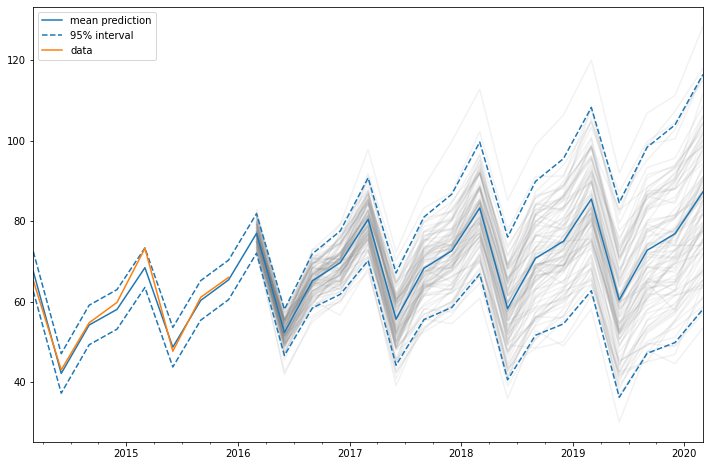

In [27]:
for i in range(simulated.shape[1]):
    simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
df["mean"].plot(label="mean prediction")
df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
pred.endog.plot(label="data")
plt.legend()

In this case, we chose “end” as simulation anchor, which means that the first simulated value will be the first out of sample value. It is also possible to choose other anchor inside the sample.